In [1]:
from prody import *

In [2]:
from pylab import *

In [3]:
from prody import calcDynamicCouplingIndex

In [4]:
LinB = parsePDB('1cv2')

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 1cv2 downloaded (1cv2.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2750 atoms and 1 coordinate set(s) were parsed in 0.11s.
@> Secondary structures were assigned to 182 residues.


In [5]:
selection = LinB.select('resnum 4 to 296')
LinB_ca = selection.select('name CA')

In [6]:
gnm = GNM('LinB')

In [7]:
gnm.buildKirchhoff(LinB_ca)

@> Kirchhoff was built in 0.03s.


In [8]:
gnm.calcModes(n_modes='all')

@> 292 modes were calculated in 0.12s.


In [9]:
atoms = LinB_ca

In [10]:
select = 'resnum 4 : 296'

In [11]:
catalytic_residues = LinB_ca.select('resnum 108 132 272')

In [12]:
func_sel = catalytic_residues

In [13]:
dci = calcDynamicCouplingIndex(gnm, atoms, select, func_sel)

/home/zahra/.local/lib/python3.10/site-packages/prody/dynamics/perturb.py:267: RuntimeWarning: divide by zero encountered in divide
  return numerator/denominator


In [14]:
absolute_dci = abs(dci)

print(absolute_dci)


[3.92310871e+13 4.86377466e+13 1.31779483e+14 9.45533948e+13
 9.92314793e+13 1.38351811e+14 1.31065355e+14 1.97970298e+14
 2.12044678e+14 3.21444723e+14 5.75452360e+14 1.08822289e+15
 4.52605114e+15            inf 7.79628610e+15 1.13662423e+15
 5.77457511e+14 5.53587456e+14 2.94666026e+14 2.24604278e+14
 1.56633457e+14 1.90193480e+14 1.55863776e+14 1.73808558e+14
 1.71419057e+14 2.21079668e+14 2.89797357e+14 2.89597544e+14
 1.85315668e+14 1.67508972e+14 1.86587532e+13 3.29594138e+14
 2.76589387e+14 6.70325517e+14 6.50830199e+14 3.96380901e+13
 9.56108659e+13 1.15535746e+14 1.09407924e+14 8.64588064e+13
 5.20440387e+13 1.44226644e+13 4.32726883e+13 5.18255041e+12
 1.52133663e+13 6.51070755e+13 8.02358288e+13 4.31265220e+13
 1.15285488e+14 1.25133459e+14 1.41541731e+14 1.74701701e+14
 1.88140928e+14 1.94308402e+14 1.56837678e+14 1.85820786e+14
 1.25477406e+14 2.24869061e+14 1.97206449e+14 3.36823986e+14
 1.12314947e+15 1.77182764e+15 2.93638448e+14 1.91714413e+14
 2.66833382e+14 3.629246

In [15]:
dci_cutoff = np.percentile(absolute_dci, 100) 
 
dci_residues = [residue for residue, value in zip(LinB_ca.getResnames(), absolute_dci)if value < dci_cutoff]

imresnames_and_nums = list(zip(LinB_ca.getResnames(), LinB_ca.getResnums()))


dci_residues = [(resname, resnum) for (resname, resnum), value in zip(resnames_and_nums, absolute_dci) if value < dci_cutoff]

/home/zahra/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [16]:
with open('dci.npy', 'wb')as f:
    ...:     np.save(f, absolute_dci)

In [17]:
print(absolute_dci)

[3.92310871e+13 4.86377466e+13 1.31779483e+14 9.45533948e+13
 9.92314793e+13 1.38351811e+14 1.31065355e+14 1.97970298e+14
 2.12044678e+14 3.21444723e+14 5.75452360e+14 1.08822289e+15
 4.52605114e+15            inf 7.79628610e+15 1.13662423e+15
 5.77457511e+14 5.53587456e+14 2.94666026e+14 2.24604278e+14
 1.56633457e+14 1.90193480e+14 1.55863776e+14 1.73808558e+14
 1.71419057e+14 2.21079668e+14 2.89797357e+14 2.89597544e+14
 1.85315668e+14 1.67508972e+14 1.86587532e+13 3.29594138e+14
 2.76589387e+14 6.70325517e+14 6.50830199e+14 3.96380901e+13
 9.56108659e+13 1.15535746e+14 1.09407924e+14 8.64588064e+13
 5.20440387e+13 1.44226644e+13 4.32726883e+13 5.18255041e+12
 1.52133663e+13 6.51070755e+13 8.02358288e+13 4.31265220e+13
 1.15285488e+14 1.25133459e+14 1.41541731e+14 1.74701701e+14
 1.88140928e+14 1.94308402e+14 1.56837678e+14 1.85820786e+14
 1.25477406e+14 2.24869061e+14 1.97206449e+14 3.36823986e+14
 1.12314947e+15 1.77182764e+15 2.93638448e+14 1.91714413e+14
 2.66833382e+14 3.629246

In [21]:
import numpy as np

np.save('absolute_dci.npy', absolute_dci)
loaded_array = np.load('absolute_dci.npy')
print(loaded_array)

[3.92310871e+13 4.86377466e+13 1.31779483e+14 9.45533948e+13
 9.92314793e+13 1.38351811e+14 1.31065355e+14 1.97970298e+14
 2.12044678e+14 3.21444723e+14 5.75452360e+14 1.08822289e+15
 4.52605114e+15            inf 7.79628610e+15 1.13662423e+15
 5.77457511e+14 5.53587456e+14 2.94666026e+14 2.24604278e+14
 1.56633457e+14 1.90193480e+14 1.55863776e+14 1.73808558e+14
 1.71419057e+14 2.21079668e+14 2.89797357e+14 2.89597544e+14
 1.85315668e+14 1.67508972e+14 1.86587532e+13 3.29594138e+14
 2.76589387e+14 6.70325517e+14 6.50830199e+14 3.96380901e+13
 9.56108659e+13 1.15535746e+14 1.09407924e+14 8.64588064e+13
 5.20440387e+13 1.44226644e+13 4.32726883e+13 5.18255041e+12
 1.52133663e+13 6.51070755e+13 8.02358288e+13 4.31265220e+13
 1.15285488e+14 1.25133459e+14 1.41541731e+14 1.74701701e+14
 1.88140928e+14 1.94308402e+14 1.56837678e+14 1.85820786e+14
 1.25477406e+14 2.24869061e+14 1.97206449e+14 3.36823986e+14
 1.12314947e+15 1.77182764e+15 2.93638448e+14 1.91714413e+14
 2.66833382e+14 3.629246

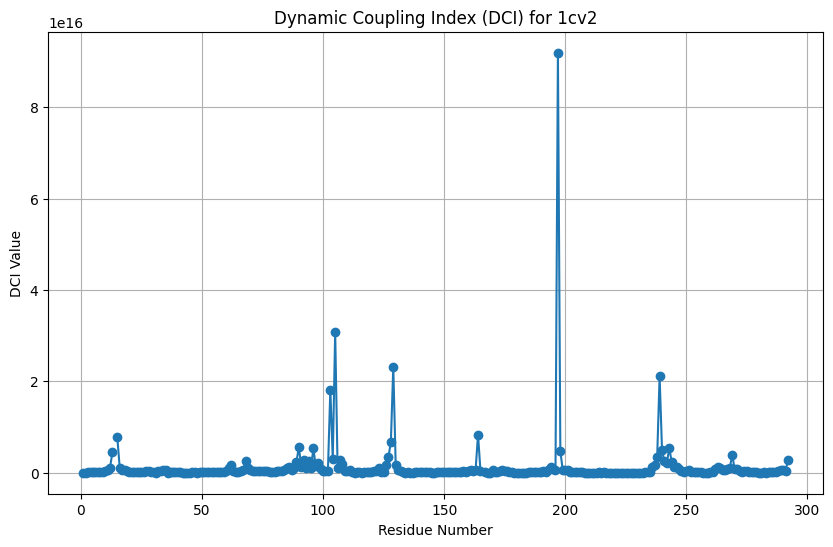

In [41]:
import numpy as np
    ...: import matplotlib.pyplot as plt
    ...: 
    ...:
    ...: dci_values = absolute_dci
    ...: 
  
    ...: residues = np.arange(1, len(dci_values) + 1)
    ...: 
    ...:
    ...: plt.figure(figsize=(10, 6))
    ...: plt.plot(residues, dci_values, marker='o')
    ...: plt.xlabel('Residue Number')
    ...: plt.ylabel('DCI Value')
    ...: plt.title('Dynamic Coupling Index (DCI) for 1cv2')
    ...: plt.grid(True)
    ...: plt.show()

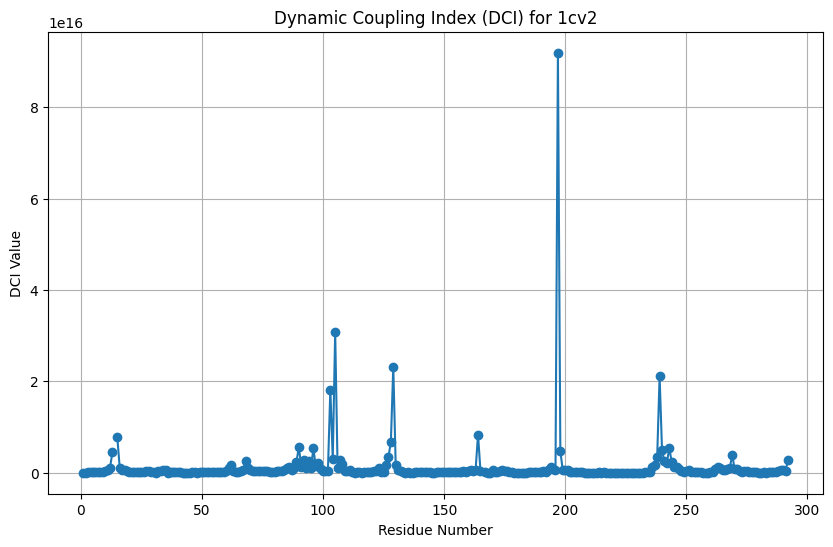

In [42]:
import numpy as np
    ...: import matplotlib.pyplot as plt
    ...: 
    ...: 
    ...: dci_values = np.load('dci.npy')
    ...: 
  
    ...: residues = np.arange(1, len(dci_values) + 1)
    ...: 
    ...:
    ...: plt.figure(figsize=(10, 6))
    ...: plt.plot(residues, dci_values, marker='o')
    ...: plt.xlabel('Residue Number')
    ...: plt.ylabel('DCI Value')
    ...: plt.title('Dynamic Coupling Index (DCI) for 1cv2')
    ...: plt.grid(True)
    ...: plt.show()

IndexError: index 292 is out of bounds for axis 0 with size 292

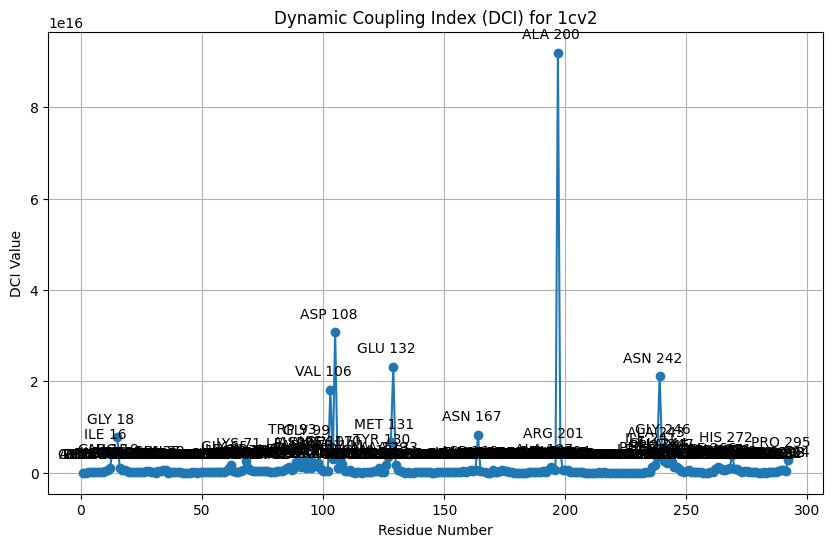

In [43]:
import numpy as np
import matplotlib.pyplot as plt


dci_values = absolute_dci




plt.figure(figsize=(10, 6))
plt.plot(residues, dci_values, marker='o')
plt.xlabel('Residue Number')
plt.ylabel('DCI Value')
plt.title('Dynamic Coupling Index (DCI) for 1cv2')
plt.grid(True)


for i, (name, number) in enumerate(resnames_and_nums):
    plt.annotate(f'{name} {number}', (number, absolute_dci[i]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


dci_values = np.load('dci.npy')


plt.figure(figsize=(10, 6))
plt.plot(residues, dci_values, marker='o')
plt.xlabel('Residue Number')
plt.ylabel('DCI Value')
plt.title('Dynamic Coupling Index (DCI) for 1cv2')
plt.grid(True)


for i, (name, number) in enumerate(resnames_and_nums):
    plt.annotate(f'{name} {number}', (number, dci_values[i]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


dci_values = np.load('dci.npy')

residue_mapping = {
    "ALA": "A",
    "CYS": "C",
    "ASP": "D",
    "GLU": "E",
    "PHE": "F",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LYS": "K",
    "LEU": "L",
    "MET": "M",
    "ASN": "N",
    "PRO": "P",
    "GLN": "Q",
    "ARG": "R",
    "SER": "S",
    "THR": "T",
    "VAL": "V",
    "TRP": "W",
    "TYR": "Y"
}

fig, ax = plt.subplots(figsize=(12, 10), dpi=100)

x_values = np.arange(4, 4 + len(absolute_dci))

ax.plot(x_values, absolute_dci, marker='o', linestyle='-')

subset_color = 'red'

for i, value_tuple in enumerate(resnames_and_nums):
    if absolute_dci[i] > 0.5e16:
        
        value = value_tuple[0]
       
        one_letter_code = residue_mapping.get(value.upper(), "?")
      
        label = f"{one_letter_code} {i+4}"
        ax.annotate(label, (i+4, absolute_dci[i]), textcoords="offset points", xytext=(2,10), ha='center', fontsize=16)
        ax.plot(i+4, absolute_dci[i], marker='o', linestyle='', color=subset_color)


grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x)+4, max(x)+300, 15))



ax.set_xlabel('Residue Number', fontsize=14)
ax.set_ylabel('DCI Value', fontsize=14)
ax.set_title('Dynamic Coupling Index (DCI) for LinB', fontsize=14)

plt.show()


In [44]:
for (resname, resnum), value in zip(resnames_and_nums, absolute_dci):
    print(f"Residue {resnum} ({resname}): absolute_dci = {value}")

Residue 4 (GLY): absolute_dci = 39231087092915.984
Residue 5 (ALA): absolute_dci = 48637746592162.99
Residue 6 (LYS): absolute_dci = 131779482776026.75
Residue 7 (PRO): absolute_dci = 94553394771167.9
Residue 8 (PHE): absolute_dci = 99231479311380.83
Residue 9 (GLY): absolute_dci = 138351811461271.3
Residue 10 (GLU): absolute_dci = 131065355209290.44
Residue 11 (LYS): absolute_dci = 197970297546003.75
Residue 12 (LYS): absolute_dci = 212044678059614.88
Residue 13 (PHE): absolute_dci = 321444722525126.75
Residue 14 (ILE): absolute_dci = 575452360460669.2
Residue 15 (GLU): absolute_dci = 1088222886154525.5
Residue 16 (ILE): absolute_dci = 4526051138295515.0
Residue 17 (LYS): absolute_dci = inf
Residue 18 (GLY): absolute_dci = 7796286096539876.0
Residue 19 (ARG): absolute_dci = 1136624229691952.8
Residue 20 (ARG): absolute_dci = 577457510613969.4
Residue 21 (MET): absolute_dci = 553587455870280.6
Residue 22 (ALA): absolute_dci = 294666026498951.0
Residue 23 (TYR): absolute_dci = 224604278

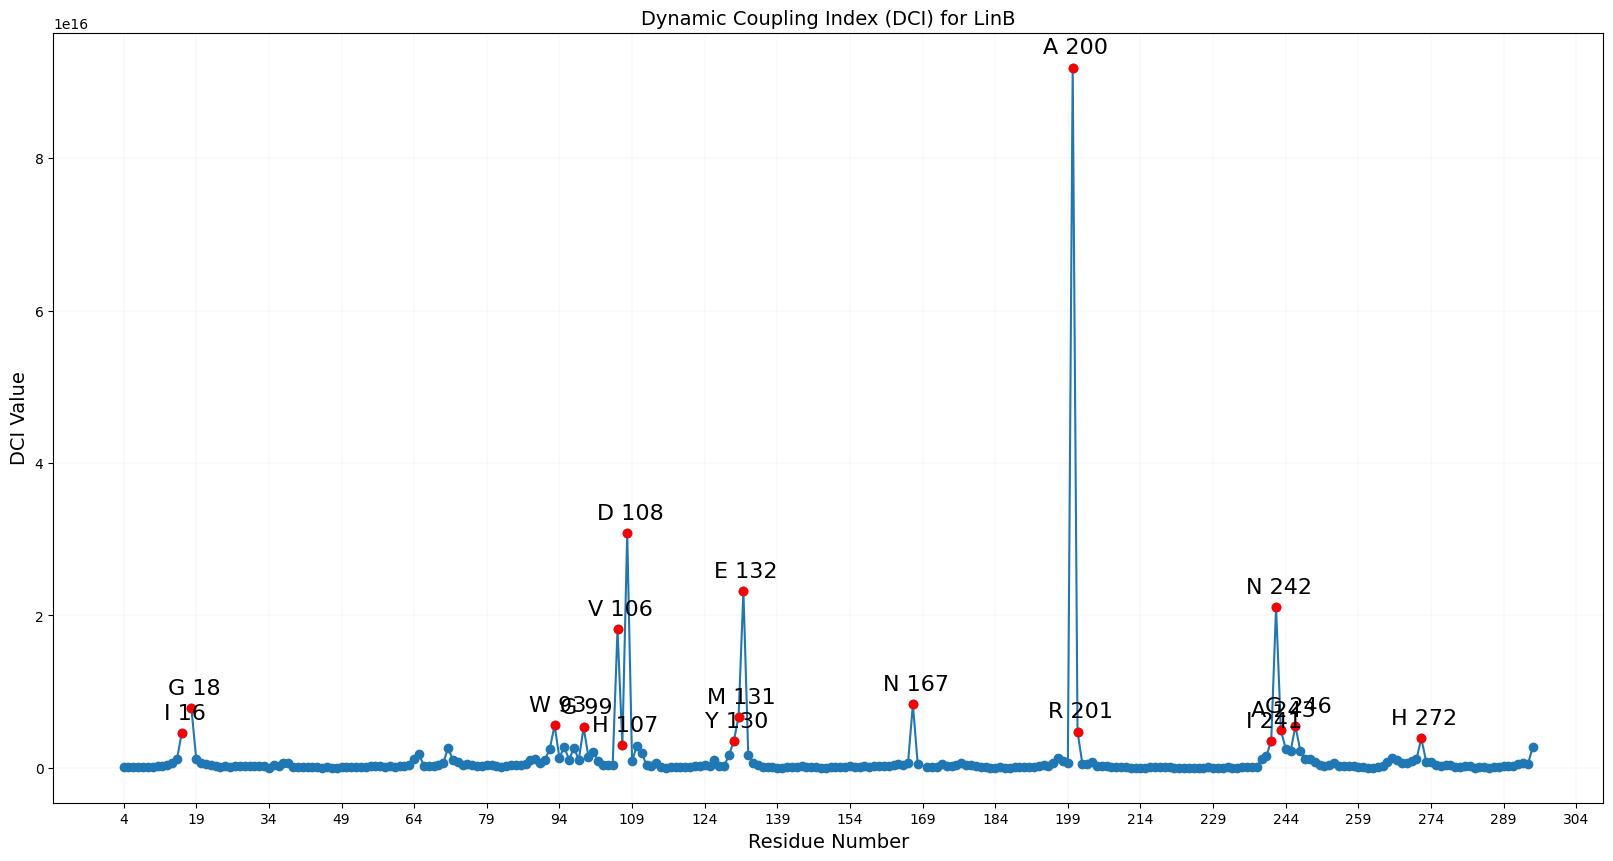

In [47]:
import matplotlib.pyplot as plt
import numpy as np


dci_values = np.load('dci.npy')

residue_mapping = {
    "ALA": "A",
    "CYS": "C",
    "ASP": "D",
    "GLU": "E",
    "PHE": "F",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LYS": "K",
    "LEU": "L",
    "MET": "M",
    "ASN": "N",
    "PRO": "P",
    "GLN": "Q",
    "ARG": "R",
    "SER": "S",
    "THR": "T",
    "VAL": "V",
    "TRP": "W",
    "TYR": "Y"
}

fig, ax = plt.subplots(figsize=(20, 10), dpi=100)


x_values = np.arange(4, 4 + len(dci_values))

ax.plot(x_values, dci_values, marker='o', linestyle='-') 

subset_color = 'red'


for i, value_tuple in enumerate(resnames_and_nums[:len(dci_values)]): 
    if dci_values[i] > 0.3e16: 
        
        value = value_tuple[0]
        
        one_letter_code = residue_mapping.get(value.upper(), "?")
      
        label = f"{one_letter_code} {i+4}"
        ax.annotate(label, (i+4, dci_values[i]), textcoords="offset points", xytext=(2,10), ha='center', fontsize=16)
        ax.plot(i+4, dci_values[i], marker='o', linestyle='', color=subset_color)


grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x)+4, max(x)+300, 15))

ax.set_xlabel('Residue Number', fontsize=14)
ax.set_ylabel('DCI Value', fontsize=14)
ax.set_title('Dynamic Coupling Index (DCI) for LinB', fontsize=14)

plt.show()

